## Business Case: Yulu - Hypothesis Testing

### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

So, the company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands?


#### Columns Description:

- datetime: The date and time of bike rentals (currently in object format, may need conversion to datetime).
- season: Categorical (1: spring, 2: summer, 3: fall, 4: winter).
- holiday: Binary (0 or 1), indicating if the day is a holiday.
- workingday: Binary (0 or 1), indicating if the day is a working day.
- weather: Categorical, describing the weather conditions.
- temp: Numeric, temperature in Celsius.
- atemp: Numeric, 'feels like' temperature in Celsius.
- humidity: Numeric, percentage humidity.
- windspeed: Numeric, wind speed.
- casual: Numeric, count of casual users.
- registered: Numeric, count of registered users.
- count: Numeric, total count of rented bikes (casual + registered).

Including Libraries Required for this project and reading the data

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [49]:
#load dataset 
bike = pd.read_csv('yulu_bike_sharing_dataset.csv')

Printing Description of the data and info and first 5 rows of the data

In [50]:
bike.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [51]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [52]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Conslusion after reading the data: 

- The dataset contains 10,886 entries and 12 columns.

Data Types of All the Attributes:

- The dataset primarily consists of numeric (int64 and float64) and one object type (datetime) columns.
- The 'datetime' column is in object format and should ideally be converted to a datetime data type for better analysis.

Conversion of Categorical Attributes to 'Category':

- We haven't yet converted categorical variables like 'season', 'holiday', 'workingday', and 'weather' to 'category' data type. This conversion can optimize memory usage and is beneficial for certain types of analysis.

Missing Value Detection:

- The initial overview indicated that there are no missing values in any of the columns. However, a deeper check for missing or null values can be performed for assurance.


Based on what the company have asked, I have refined the problem statement

**Refined Problem Statement**: "Identify and Quantify the Key Factors Influencing the Demand for Shared Electric Bikes in an Urban Environment"

This problem statement involves several dimensions:

1. Temporal Analysis:
      - Understanding how demand varies with time – hourly, daily, weekly, and seasonally.
      - Investigating the impact of special days (holidays and working days) on bike usage patterns.
Weather Dependence:
      - Examining the relationship between weather conditions (clear, cloudy, rain, etc.) and bike rental demand.
      - Analyzing how temperature, 'feels like' temperature, humidity, and wind speed affect the usage of bikes.
2. User Segmentation:
      Differentiating between casual and registered users in terms of usage patterns.
      Exploring demographic or other available data to understand different user behaviors.
3. External Factors:
      - Considering external factors like public transport strikes, urban infrastructure changes, or significant local events.
      - Assessing the impact of competitive services or changes in urban mobility trends.


Part 1 :Descriptive Statistics

In [53]:
# Convert 'datetime' to datetime data type
bike['datetime'] = pd.to_datetime(bike['datetime'])

# Convert 'season', 'holiday', 'workingday', and 'weather' to 'category' data type
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
bike[categorical_columns] = bike[categorical_columns].astype('category')

# Check for missing values
missing_values = bike.isnull().sum()

# Updated data types and missing values check
data_types = bike.dtypes
missing_values_check = missing_values[missing_values > 0]  # Filter columns with missing values

data_types, missing_values_check

(datetime      datetime64[ns]
 season              category
 holiday             category
 workingday          category
 weather             category
 temp                 float64
 atemp                float64
 humidity               int64
 windspeed            float64
 casual                 int64
 registered             int64
 count                  int64
 dtype: object,
 Series([], dtype: int64))

After Converting the datetime column and checking again the data types of all the columns and check for missing values and duplicates

Making Some visualizations to understand the data better

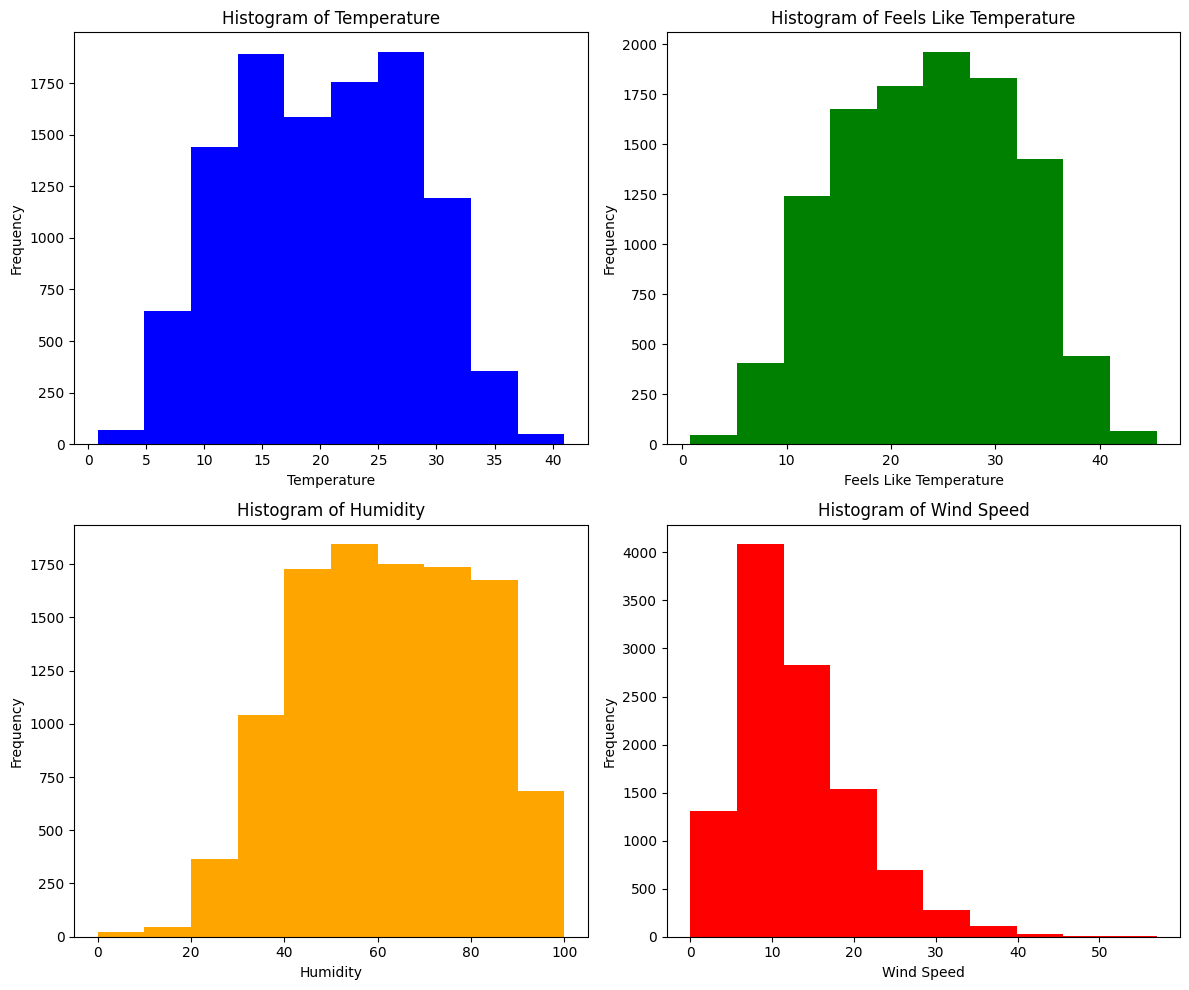

In [54]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram of 'temp'
axs[0, 0].hist(bike['temp'], bins=10, color='blue')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Temperature')

# Histogram of 'atemp'
axs[0, 1].hist(bike['atemp'], bins=10, color='green')
axs[0, 1].set_xlabel('Feels Like Temperature')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Feels Like Temperature')

# Histogram of 'humidity'
axs[1, 0].hist(bike['humidity'], bins=10, color='orange')
axs[1, 0].set_xlabel('Humidity')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Humidity')

# Histogram of 'windspeed'
axs[1, 1].hist(bike['windspeed'], bins=10, color='red')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Wind Speed')

# Adjust spacing between subplots
plt.tight_layout()

# Show the concatenated histogram
plt.show()


Continuous Variables:

- Temperature (temp) and 'Feels Like' Temperature (atemp): Both show similar distributions, indicating a reasonable spread across different temperatures.
- Humidity (humidity): The distribution is somewhat uniform but with a slight increase in frequency at higher humidity levels.
- Wind Speed (windspeed): Most of the data points are clustered at lower wind speeds, indicating that high wind speeds are less common.

Compute the frequency distribution using value_counts() function

In [55]:
column_name = 'temp'
frequency_distribution = bike[column_name].value_counts()
print(frequency_distribution)


14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64


Plot bar for the Categroical Variables

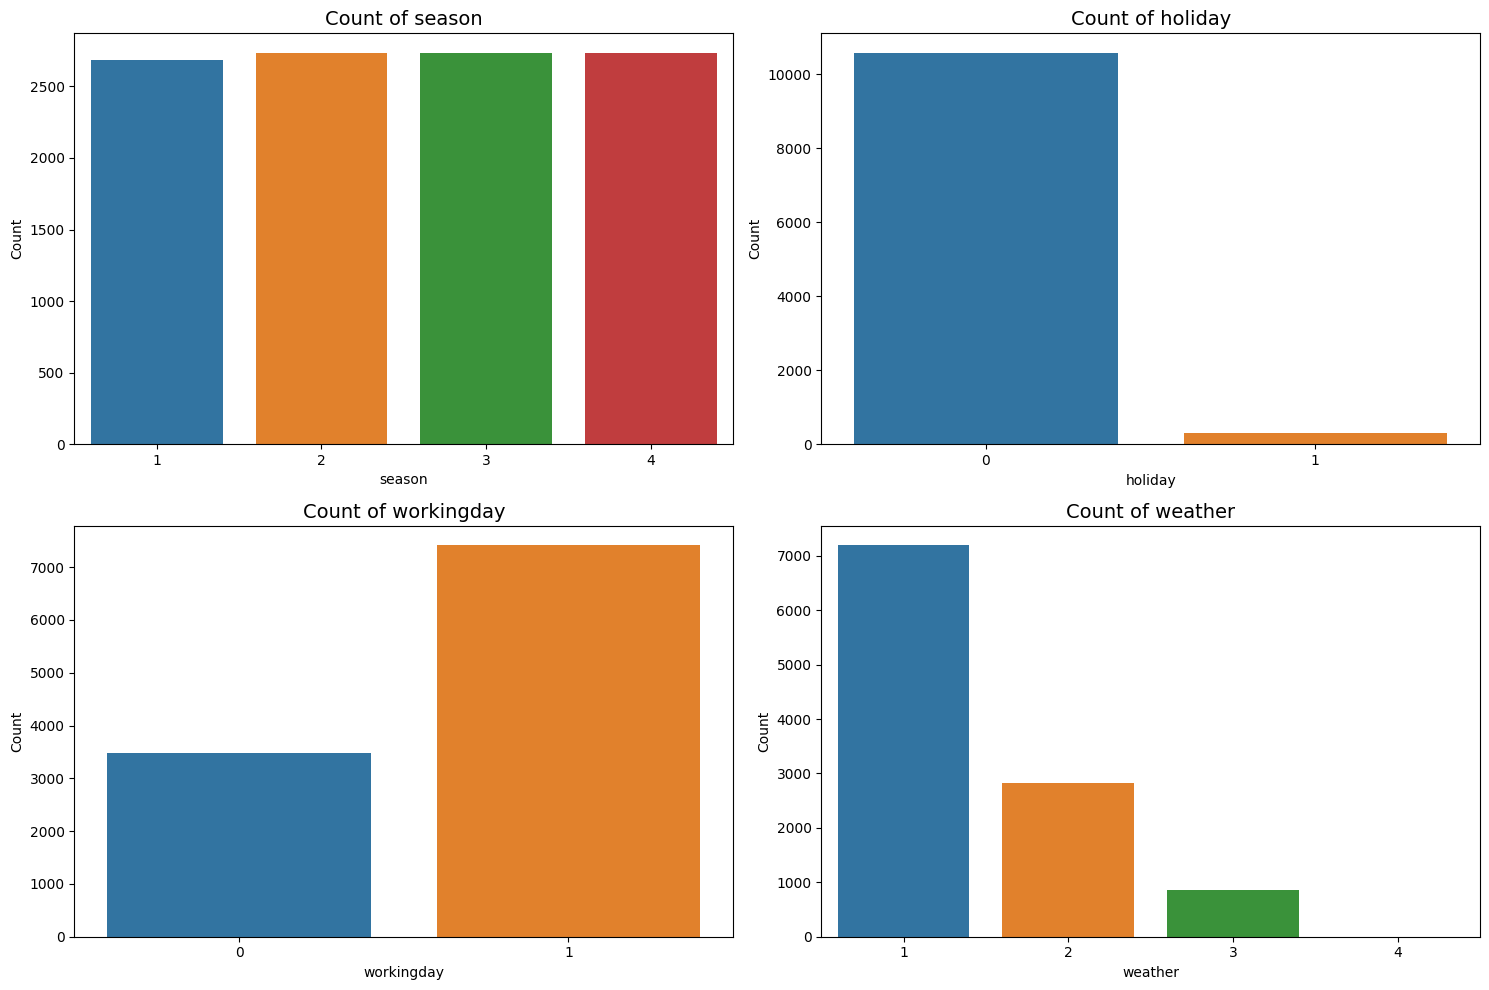

In [56]:
# Categorical Variables
categorical_variables = ['season', 'holiday', 'workingday', 'weather']

# Plotting count plots for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flattening the axes array for easy indexing

for i, col in enumerate(categorical_variables):
    sns.countplot(x=col, data=bike, ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Construct Pie Chart for the Categorical Variables

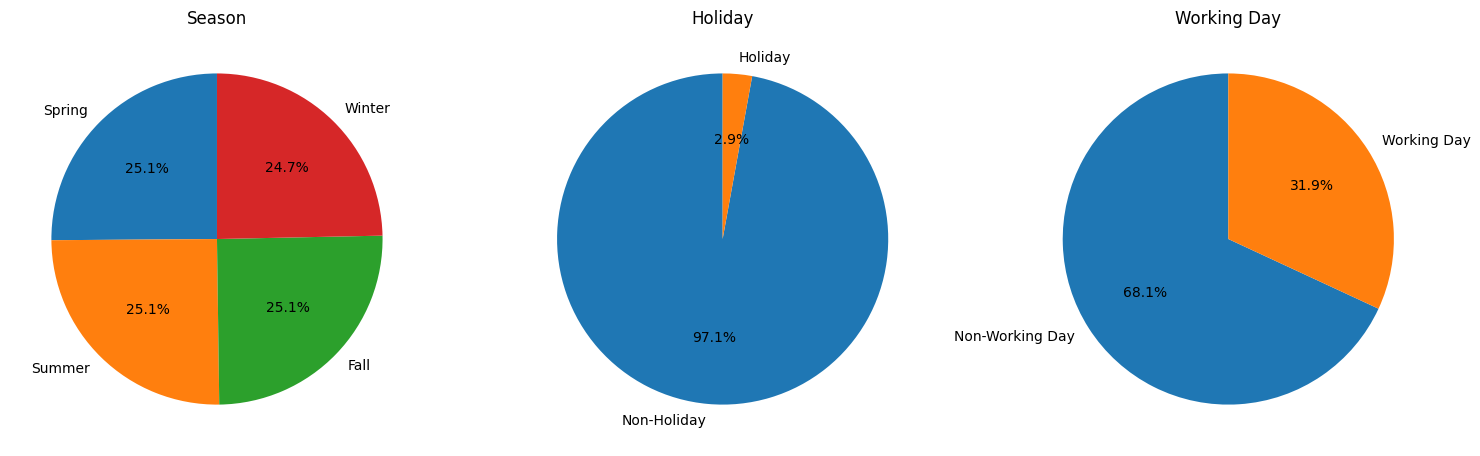

In [57]:
# Calculate the count of each category
season_counts = bike['season'].value_counts()
holiday_counts = bike['holiday'].value_counts()
workingday_counts = bike['workingday'].value_counts()

# Create a list of labels for the pie chart
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
holiday_labels = ['Non-Holiday', 'Holiday']
workingday_labels = ['Non-Working Day', 'Working Day']

# Create subplots for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for 'season'
axs[0].pie(season_counts, labels=season_labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Season')

# Pie chart for 'holiday'
axs[1].pie(holiday_counts, labels=holiday_labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Holiday')

# Pie chart for 'workingday'
axs[2].pie(workingday_counts, labels=workingday_labels, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Working Day')

# Adjust spacing between subplots
plt.tight_layout()

# Show the pie charts
plt.show()


Categorical Variables:

- Season (season): The dataset seems to have a relatively balanced distribution across different seasons.
- Holiday (holiday): There are significantly fewer days classified as holidays compared to non-holidays.
- Working Day (workingday): More days are classified as working days than non-working days.

plot box plot

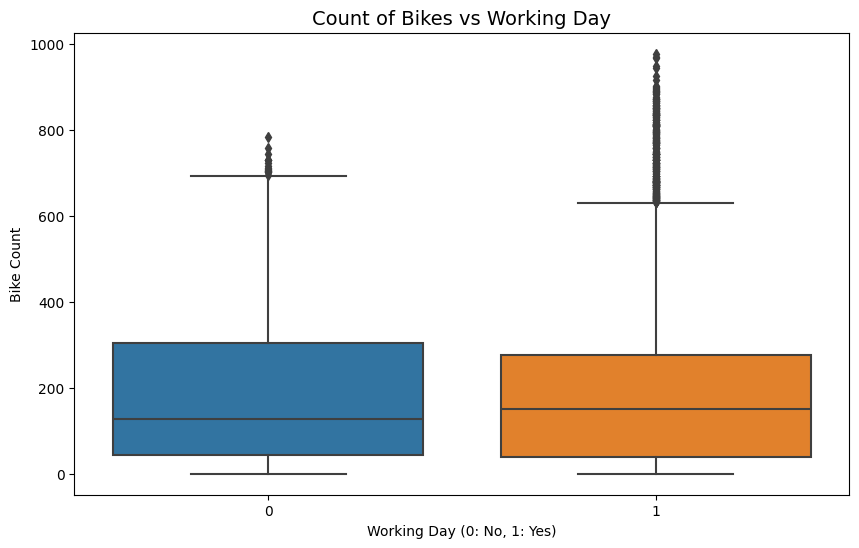

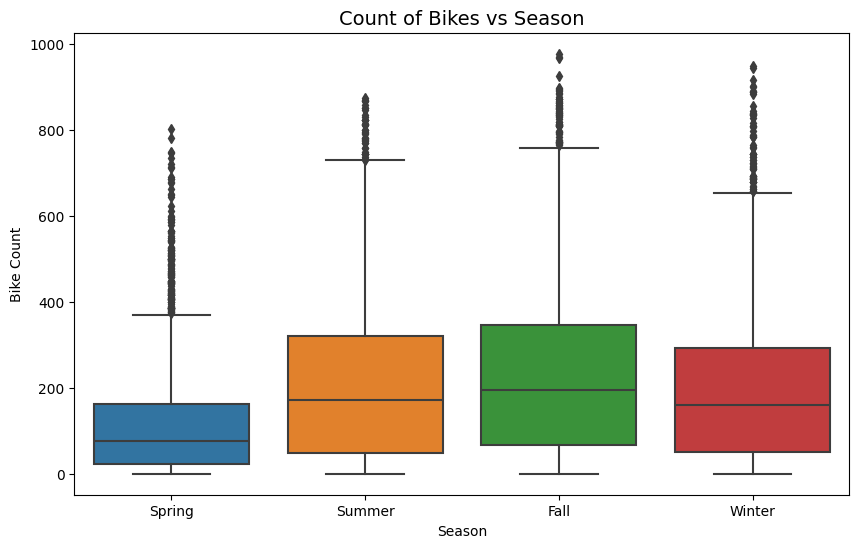

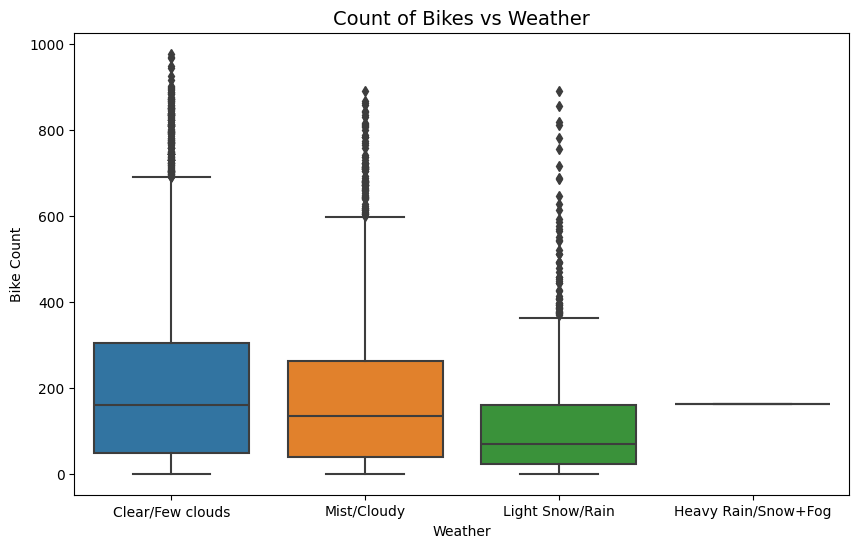

In [47]:
# Bivariate Analysis: Exploring relationships between important categorical variables and 'count'

# Mapping for seasons
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mapping for weather
weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow+Fog'
}

# Adjusting the figure size and layout to have larger boxplots, one per row with renamed x-axis labels

# Relationship between 'workingday' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=bike)
plt.title('Count of Bikes vs Working Day', fontsize=14)
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Bike Count')
plt.show()

# Relationship between 'season' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=bike)
plt.title('Count of Bikes vs Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=season_mapping.values())  # Renaming x-axis labels for seasons
plt.show()

# Relationship between 'weather' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=bike)
plt.title('Count of Bikes vs Weather', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Bike Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=weather_mapping.values())  # Renaming x-axis labels for weather
plt.show()

Construct a heatmap 

C:\Users\Mega\AppData\Local\Temp\ipykernel_4084\1652877795.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bike.corr()


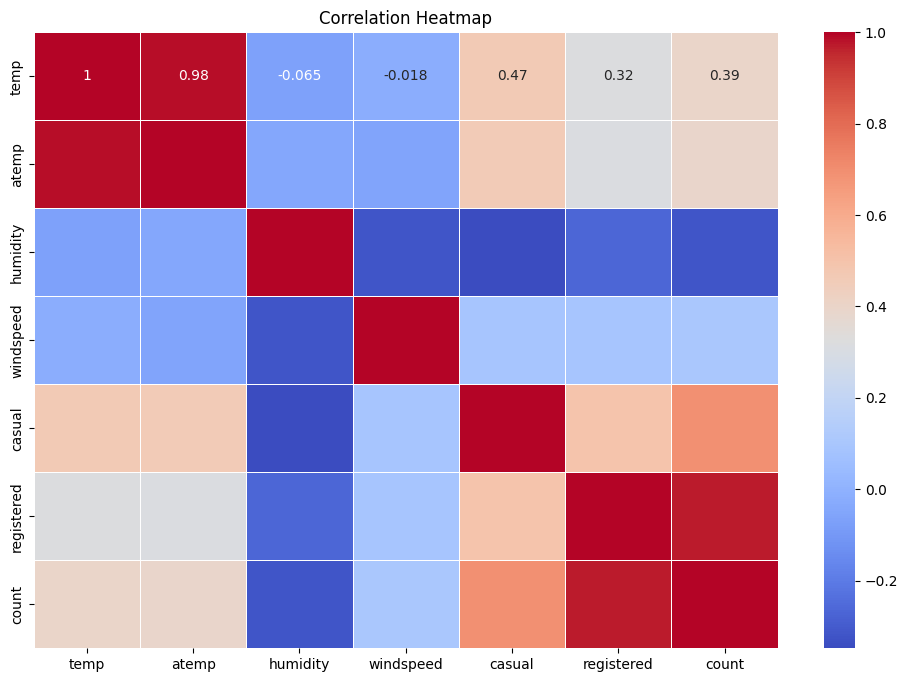

In [58]:
# Create Heatmap for Correlation Matrix
import seaborn as sns

# Compute the correlation matrix
corr_matrix = bike.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Here are some conclusions we can draw from the heatmap:

- The variable 'temp' has a strong positive correlation with the target variable 'count', indicating that higher temperatures are associated with higher bike rental counts.
- Similarly, the variable 'atemp' (feels like temperature) also has a strong positive correlation with 'count'.
- The variables 'humidity' and 'windspeed' have a negative correlation with 'count', suggesting that higher humidity and windspeed are associated with lower bike rental counts.
- There is a strong positive correlation between 'registered' and 'count', indicating that the number of registered users has a significant impact on the overall bike rental count.
- The variables 'casual' and 'count' also have a positive correlation, suggesting that the number of casual users also contributes to the overall bike rental count.


Summary:

- The EDA revealed valuable insights into the factors influencing bike rental demand. Seasonal changes, weather conditions, and whether a day is a working day significantly impact bike usage. The data also indicated potential areas for further investigation, such as the reasons behind the outliers in bike rental counts.

Calculate both Spearman and Pearson correlation coefficient.
Define These Techniques:
- Pearson Correlation: In statistics, the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data.

- Spearmans correlation: Spearman's Rank correlation coefficient is a technique which can be used to summarise the strength and direction (negative or positive) of a relationship between two variables. 

In [60]:
# Calculate Spearman correlation coefficient
spearman_corr = bike['temp'].corr(bike['count'], method='spearman')

# Calculate Pearson correlation coefficient
pearson_corr = bike['temp'].corr(bike['count'], method='pearson')

# Print the results
print("Spearman correlation coefficient:", spearman_corr)
print("Pearson correlation coefficient:", pearson_corr)


Spearman correlation coefficient: 0.40798939475098117
Pearson correlation coefficient: 0.394453644967249
